# Effect of the number of samples

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
df = pd.read_csv('../exp_data/num_start_samples_experiment.csv')
df = df.rename(columns={"Unnamed: 0": "number_of_samples"})
df = df.set_index('number_of_samples')

In [3]:
df

,mean_mae,std_mae,mean_mse,std_mse,mean_rmse,std_rmse
number_of_samples,,,,,,
5,0.4651,0.0361,0.4307,0.0631,0.6545,0.0489
10,0.4376,0.0265,0.3832,0.0541,0.6175,0.0441
15,0.4288,0.0270,0.3794,0.0605,0.6142,0.0469
20,0.4143,0.0223,0.3503,0.0410,0.5909,0.0345
25,0.4099,0.0208,0.3414,0.0410,0.5833,0.0343
30,0.4014,0.0173,0.3299,0.0381,0.5734,0.0329


In [49]:
df

,mean_mae,std_mae,mean_mse,std_mse,mean_rmse,std_rmse
number_of_samples,,,,,,
5,0.4651,0.0361,0.4307,0.0631,0.6545,0.0489
10,0.4376,0.0265,0.3832,0.0541,0.6175,0.0441
15,0.4288,0.0270,0.3794,0.0605,0.6142,0.0469
20,0.4143,0.0223,0.3503,0.0410,0.5909,0.0345
25,0.4099,0.0208,0.3414,0.0410,0.5833,0.0343
30,0.4014,0.0173,0.3299,0.0381,0.5734,0.0329


In [50]:
import matplotlib.pylab as pylab
fac = 12
params = {'legend.fontsize': f'{fac}',
          'figure.figsize': (15, 7),
         'axes.labelsize': f'{fac}',
         'axes.titlesize':f'{fac}',
         'xtick.labelsize':f'{fac}',
         'ytick.labelsize':f'{fac}',
          # 'title.size': '15'
          # 'figure.titlesize': '15' 
         }
pylab.rcParams.update(params)

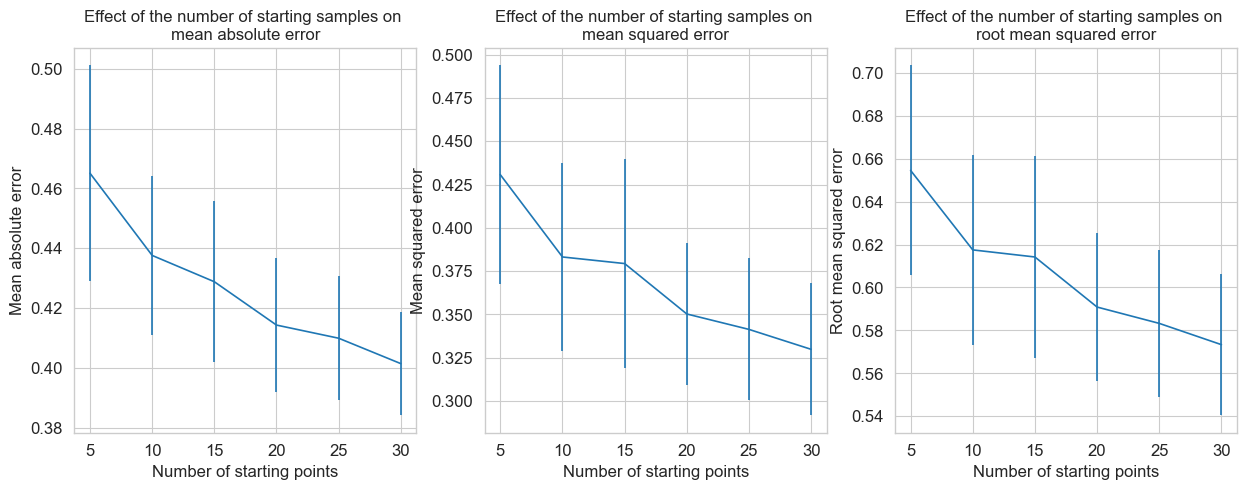

In [51]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
y_labels = {
    "mae": "Mean absolute error",
    "mse": "Mean squared error",
    "rmse": "Root mean squared error",
    
}
for i, metric in enumerate(['mae', 'mse', 'rmse']):
    y_label = y_labels[metric] 
    ax[i].errorbar(df.index, f'mean_{metric}', f'std_{metric}', data=df)
    ax[i].set_title(f"Effect of the number of starting samples on \n{y_label.lower()}")
    ax[i].set_xlabel('Number of starting points')
    ax[i].set_ylabel(y_label)
fig.savefig(f'../figs/effect_num_samples.pdf', bbox_inches='tight')
fig.savefig(f'../figs/effect_num_samples.png', bbox_inches='tight')

/Users/anjanayodaiken/anaconda3/envs/L48-Project_rev2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjanayodaiken/anaconda3/envs/L48-Project_rev2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjanayodaiken/anaconda3/envs/L48-Project_rev2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjanayodaiken/anaconda3/envs/L48-Project_rev2/lib/python3.10/site-packages

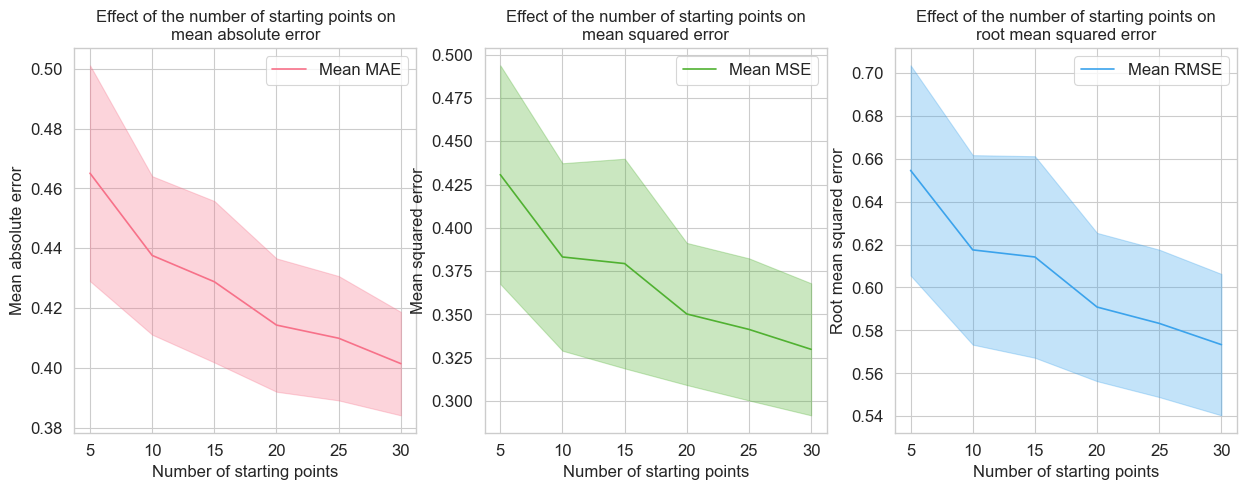

In [52]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
y_labels = {
    "mae": "Mean absolute error",
    "mse": "Mean squared error",
    "rmse": "Root mean squared error",
    
}
palette = sns.color_palette("husl", len(y_labels))

for i, metric in enumerate(['mae', 'mse', 'rmse']):
    y_label = y_labels[metric]
    sns.lineplot(data=df, x=df.index, y=f"mean_{metric}", ax=ax[i], label=f"Mean {metric.upper()}", color=palette[i])
    ax[i].fill_between(df.index, df[f"mean_{metric}"] - df[f"std_{metric}"], df[f"mean_{metric}"] + df[f"std_{metric}"], alpha=0.3, color=palette[i])
    ax[i].set_title(f"Effect of the number of starting points on\n{y_label.lower()}")
    ax[i].set_xlabel('Number of starting points')
    ax[i].set_ylabel(y_label)

fig.savefig(f'../figs/effect_num_samples.pdf', bbox_inches='tight')
fig.savefig(f'../figs/effect_num_samples.png', bbox_inches='tight')

In [39]:
df['mean_mae']

number_of_samples
5     0.5430
10    0.4376
15    0.4288
20    0.4143
25    0.4099
30    0.4014
Name: mean_mae, dtype: float64

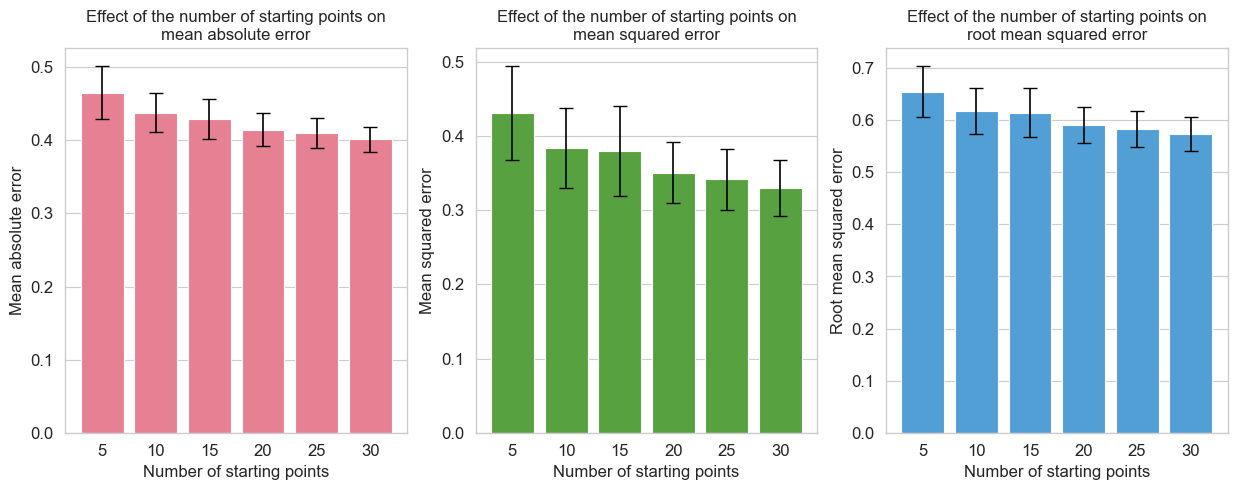

In [53]:
y_labels = {
    "mae": "Mean absolute error",
    "mse": "Mean squared error",
    "rmse": "Root mean squared error",
}
palette = sns.color_palette("husl", len(y_labels))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['mae', 'mse', 'rmse']):
    y_label = y_labels[metric]

    bar_plot = sns.barplot(x=df.index, y=df[f"mean_{metric}"], ax=ax[i], palette=[palette[i]])

    num_bars = len(df.index)
    bar_width = bar_plot.patches[0].get_width()
    bar_centers = np.array([bar.get_x() + bar_width / 2 for bar in bar_plot.patches])

    ax[i].errorbar(x=bar_centers, y=df[f"mean_{metric}"], yerr=df[f"std_{metric}"], fmt='none', c='black', capsize=5)

    ax[i].set_title(f"Effect of the number of starting points on\n{y_label.lower()}")
    ax[i].set_xlabel('Number of starting points')
    ax[i].set_ylabel(y_label)

fig.savefig('../figs/effect_num_samples_bar.pdf', bbox_inches='tight')
fig.savefig('../figs/effect_num_samples_bar.png', bbox_inches='tight')

plt.show()


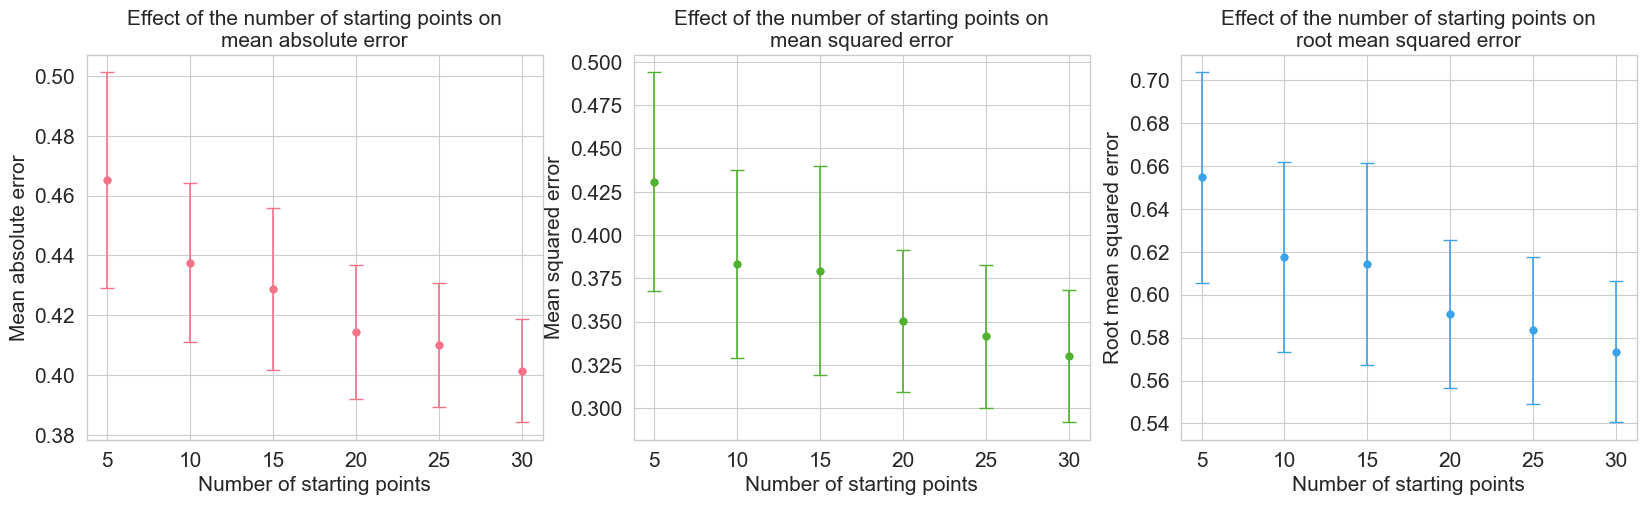

In [58]:
import matplotlib.pylab as pylab
fac = 15
params = {'legend.fontsize': f'{fac}',
          'figure.figsize': (15, 7),
         'axes.labelsize': f'{fac}',
         'axes.titlesize':f'{fac}',
         'xtick.labelsize':f'{fac}',
         'ytick.labelsize':f'{fac}',
          # 'title.size': '15'
          # 'figure.titlesize': '15' 
         }
pylab.rcParams.update(params)

y_labels = {
    "mae": "Mean absolute error",
    "mse": "Mean squared error",
    "rmse": "Root mean squared error",
}

palette = sns.color_palette("husl", len(y_labels))
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(['mae', 'mse', 'rmse']):
    y_label = y_labels[metric]

    # Create a scatter plot
    ax[i].scatter(df.index, df[f"mean_{metric}"], color=palette[i])

    # Adding error bars
    ax[i].errorbar(x=df.index, y=df[f"mean_{metric}"], yerr=df[f"std_{metric}"], fmt='o', c=palette[i], capsize=5)

    ax[i].set_title(f"Effect of the number of starting points on\n{y_label.lower()}")
    ax[i].set_xlabel('Number of starting points')
    ax[i].set_ylabel(y_label)

fig.savefig('../figs/effect_num_samples_scatter.pdf', bbox_inches='tight')
fig.savefig('../figs/effect_num_samples_scatter.png', bbox_inches='tight')

plt.show()

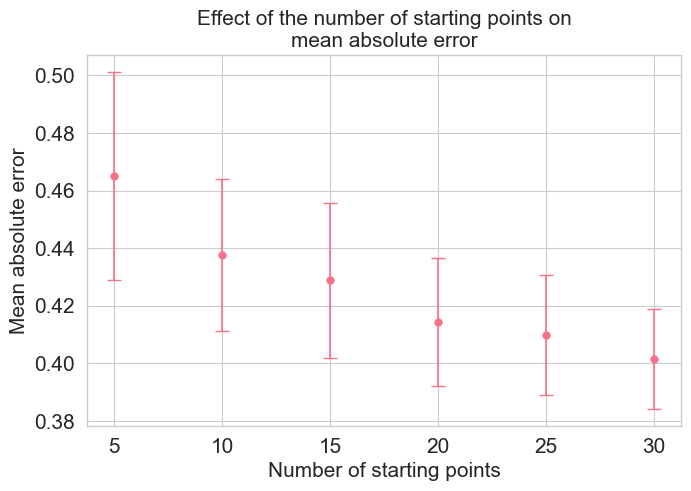

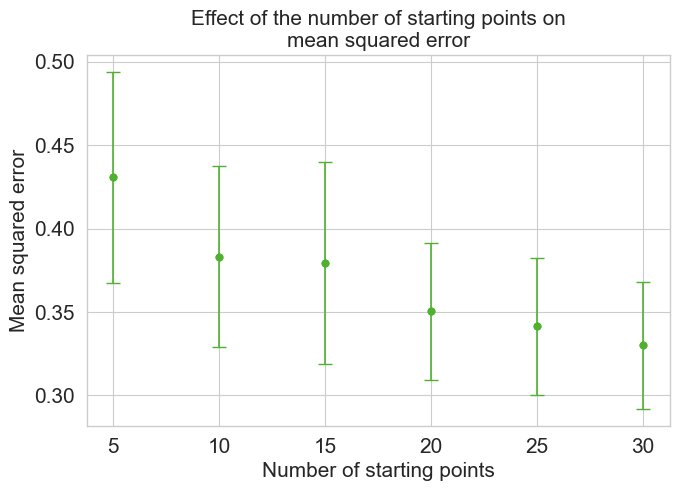

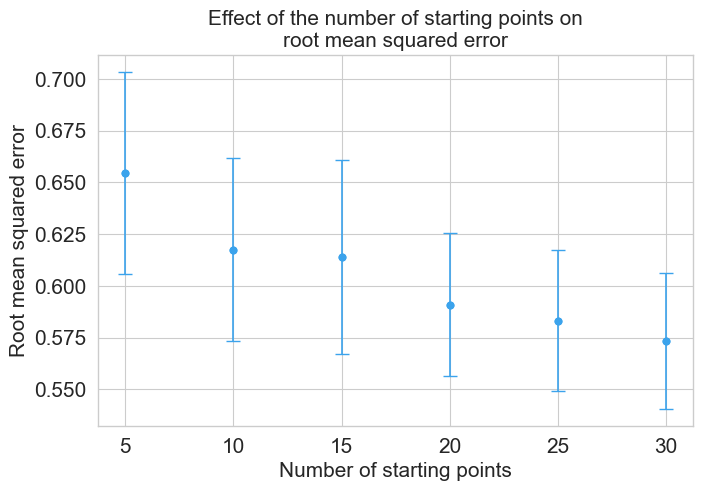

In [64]:
import matplotlib.pylab as pylab
import seaborn as sns
import matplotlib.pyplot as plt

# Your parameters seem fine, but ensure the figure size is large enough
fac = 15
params = {
    'legend.fontsize': f'{fac}',
    'figure.figsize': (7, 5),  # Adjust if needed
    'axes.labelsize': f'{fac}',
    'axes.titlesize': f'{fac}',
    'xtick.labelsize': f'{fac}',
    'ytick.labelsize': f'{fac}',
}
pylab.rcParams.update(params)

y_labels = {
    "mae": "Mean absolute error",
    "mse": "Mean squared error",
    "rmse": "Root mean squared error",
}

palette = sns.color_palette("husl", len(y_labels))

for i, metric in enumerate(['mae', 'mse', 'rmse']):
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    y_label = y_labels[metric]

    ax.scatter(df.index, df[f"mean_{metric}"], color=palette[i])
    ax.errorbar(x=df.index, y=df[f"mean_{metric}"], yerr=df[f"std_{metric}"], fmt='o', c=palette[i], capsize=5)

    ax.set_title(f"Effect of the number of starting points on\n{y_label.lower()}")
    ax.set_xlabel('Number of starting points')
    ax.set_ylabel(y_label)

    plt.tight_layout()
    
    fig.savefig(f'../figs/effect_num_samples_scatter_{metric}.pdf', bbox_inches='tight')
    fig.savefig(f'../figs/effect_num_samples_scatter_{metric}.png', bbox_inches='tight')
    
    plt.show()
